Titanic data munging lecture for CS461. Much of it is from <a href="https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii"> Kaggle's tutorial </a>.

<span style="font-size:2em">View the data with numpy arrays</span>

Make our imports.

In [204]:
import csv as csv
import numpy as npb

In [205]:
pwd

u'/Users/aarontrefler_temp2/Documents/Work : Education/Education/School_Post_UCLA/CSULA/2016 Winter/Machine Learning/Kaggle/Titanic'

Open the csv file (adjust the path to where you stored your data file).

In [206]:
csv_file_object = csv.reader(open('train.csv', 'rb')) #built in csv reader for python

Load the data into a numpy array.

In [207]:
header = csv_file_object.next() #move 'cursor' past header row
data = []
for row in csv_file_object:
    data.append(row)

data = np.array(data)
print header
print data

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


Looking at the first 15 rows of the Age column --- notice they are stored as strings, and that the column is a numpy array.

In [136]:
data[0:15,5]

array(['22', '38', '26', '35', '35', '', '54', '2', '27', '14', '4', '58',
       '20', '39', '14'], 
      dtype='|S82')

We need to change them to floats.

In [137]:
#ages_onboard = data[0:, 5].astype(np.float) #will throw an error, due to missing values

We could go back and covert all the ''s to some number, but Pandas makes this easier.
Importing Pandas, reading in the csv file.

<span style="font-size:2em">View the data with Pandas</span>

In [138]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(10) 

#note first column (i.e., index column) is not actually part of the dataframe
#SibSp: number of siblings on board
#Parch: parent on board
#Embarked: cities of boarding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


Looking at the data types and number of entries in each column. Pandas infers what they are.

In [139]:
df.info()

#types are defined by numpy - Pandas sits on top of numpy

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Getting some descriptive statistics.

In [140]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
df.Age.mean() #get the mean, series objects have a methods like mean, median, etc
df['Age'].mean() #same as above command

29.69911764705882

<span style="font-size:2em">Data Munging</span>

<span style="font-size:1.5em">Examining the Ages</span>

Looking at specific columns.

In [142]:
df[['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
0,male,3,22
1,female,1,38
2,female,3,26
3,female,1,35
4,male,3,35


Getting data for people over 60.

In [143]:
df[df.Age > 60] #df.Age > 60 returns a boolean array

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [144]:
df[df.Age > 60][['Sex', 'Pclass', 'Age', 'Survived']].head()

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0


We need to do something about the missing age values. To examine them, and to look at ages a bit more:

In [145]:
len(df[df.Age.isnull()])

177

In [146]:
df[df.Age.isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Getting counts for males in each Pclass.

In [147]:
for i in range(1,4): #loops from 1 to 3
    print 'Pclass: ', i, len(df[(df.Sex == 'male')&(df.Pclass == i)])

Pclass:  1 122
Pclass:  2 108
Pclass:  3 347


Getting counts for females in each Pclass

In [148]:
for i in range(1,4): #loops from 1 to 3
    print 'Pclass: ', i, len(df[(df.Sex == 'female')&(df.Pclass == i)])
#note: in Pandas use "&" for AND, "\" for OR

Pclass:  1 94
Pclass:  2 76
Pclass:  3 144


Making a histogram of ages.

Populating the interactive namespace from numpy and matplotlib


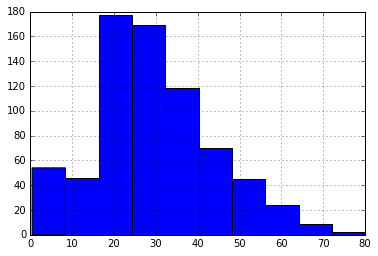

In [149]:
import pylab as P #pylab used for graphing

# tells pylab to open the graph in our notebook, otherwise new window will open
%pylab inline 
df.Age.hist()

<span style="font-size:1.5em">Munging Gender and Ages</span>

Regarding Sex, the text is not useful in machine learning algorithms. Making a new column for a better representation of Sex.

In [150]:
# don't delete columns, make new column that is diravtive of old
df['Gender'] = 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4


In [151]:
df.Gender = df.Sex.map(lambda x: x[0].upper())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,F
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,M


<strong>lambda x </strong> is an built-in function of python for generating an anonymous function in the moment, at runtime. Remember that x[0] of any string returns its first character.

We just took the first letter of each entry in the Sex column, capitalized it, and put it in the Gender column. This isn't that useful (we just did it to see lambdas in action). It would be better if the values were 0 or 1, so:

In [152]:
df.Gender = df.Sex.map({'female': 0, 'male':1}) #pass dictionary into map function, useful when mappings are limited
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


We will try something somewhat sophisticated: we will fill the missing values with the median per gender and Pclass.
To begin, we create a numpy array with two rows and three columns filled with zeros.


In [153]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [154]:
for i in range(2):
    for j in range(3):
        median_ages[i,j]=df[(df.Gender == i)&(df.Pclass == j+1)].Age.dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

Creating a new column for the adjusted ages.

In [155]:
df['AgeFill'] = df.Age
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,35
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,35


In [156]:
df[df.Age.isnull()][['Gender', 'Pclass', 'Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


Inserting the appropriate age values.

In [203]:
for i in range(2):
    for j in range(3):
        # loc returns indices
        df.loc[(df.Age.isnull())&(df.Gender == i)&(df.Pclass==j+1), 'AgeFill'] = median_ages[i,j]
df[df.Age.isnull()][['Gender', 'Pclass', 'Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [158]:
df['Age'].min() #minimum age is less thatn 1-year

0.41999999999999998

<span style="font-size:1.5em">Feature Engineering</span>

We will create a new feature FamilySize that combines number of parents or children (Parch) and number of siblings (Sibsp).

In [159]:

df['FamilySize'] = df.SibSp + df.Parch
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,35,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,35,0


We will make an artificial feature that multiplies age by Pclass. The idea is that the higher the age and the higher the Pclass number, the less likely the person would survive.

e.g., an old person in 3rd class will almost certainly not make it

In [160]:

df['Age*Class'] = df.AgeFill * df.Pclass
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,FamilySize,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,22,1,66
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,38,1,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26,0,78
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,35,1,35
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,35,0,105


Scikit-learn doesn't use Pandas dataframes, but numpy arrays. We need to export our cleaned data to a numpy array.

Determining which columns are numeric (these are the only ones we can use)

In [161]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int64
AgeFill        float64
FamilySize       int64
Age*Class      float64
dtype: object

Show only the columns that are numeric.

In [162]:
data = df.select_dtypes(['float64', 'int64']) #create new dataframe
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeFill,FamilySize,Age*Class
0,1,0,3,22,1,0,7.2500,1,22,1,66
1,2,1,1,38,1,0,71.2833,0,38,1,38
2,3,1,3,26,0,0,7.9250,0,26,0,78
3,4,1,1,35,1,0,53.1000,0,35,1,35
4,5,0,3,35,0,0,8.0500,1,35,0,105


In [163]:
del data['Age'] #still has NaNs
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,22,1,66
1,2,1,1,1,0,71.2833,0,38,1,38
2,3,1,3,0,0,7.9250,0,26,0,78
3,4,1,1,1,0,53.1000,0,35,1,35
4,5,0,3,0,0,8.0500,1,35,0,105


Converting to numpy array.

In [164]:
total_data = data.values
total_data

array([[   1. ,    0. ,    3. , ...,   22. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,   38. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,   26. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,   21.5,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,   26. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,   32. ,    0. ,   96. ]])

<span style="font-size:2em">Using Scikit-Learn to Create a Prediction Model</span>

First, we need to split the data into training and test sets. We will also get rid of the Passenger Id column, as we have no use for it.

In [165]:
total_data = total_data[:, 1:] #removes the ID column
total_data

array([[  0. ,   3. ,   1. , ...,  22. ,   1. ,  66. ],
       [  1. ,   1. ,   1. , ...,  38. ,   1. ,  38. ],
       [  1. ,   3. ,   0. , ...,  26. ,   0. ,  78. ],
       ..., 
       [  0. ,   3. ,   1. , ...,  21.5,   3. ,  64.5],
       [  1. ,   1. ,   0. , ...,  26. ,   0. ,  26. ],
       [  0. ,   3. ,   0. , ...,  32. ,   0. ,  96. ]])

Importing the test_train_split function from sklearn.cross_validation. 

The function returns a tuple: the first two are the features training and test sets, the second two are the labels training and test sets. The first argument is a matrix of all the features (in our array, it's all the columns after the first one), the second is a matrix of the corresponding y-values or labels, the third determines how much of the data will be split into the test arrays. 

In [189]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(total_data[:,1:], total_data[:, 0], test_size=0.33, random_state=0)
X_test

array([[  3. ,   0. ,   0. , ...,  25. ,   0. ,  75. ],
       [  3. ,   0. ,   0. , ...,  25. ,   0. ,  75. ],
       [  3. ,   4. ,   1. , ...,   7. ,   5. ,  21. ],
       ..., 
       [  3. ,   0. ,   2. , ...,  21.5,   2. ,  64.5],
       [  2. ,   1. ,   1. , ...,  34. ,   2. ,  68. ],
       [  2. ,   0. ,   0. , ...,  24. ,   0. ,  48. ]])

Using the predictive capabilities of the scikit-learn package is very simple. In fact, it can be carried out in three simple steps: initializing the model, fitting it to the training data, and predicting new values.

Note that almost all of the model techniques in scikit-learn share a few common named functions, once they are initialized. You can always find out more about them in the documentation for each model. These are 

some-model-name.fit( )

some-model-name.predict( )



Importing scikit-learn's RandomForestClassifier.

In [190]:
from sklearn.ensemble import RandomForestClassifier #ensemble uses more than one machine learning algorithm in model
from sklearn import metrics #allows us to easily analyze our results

Creating a new RandomForestClassifier, fitting the data, producing predictions on the test set.

In [191]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)
output = forest.predict(X_test)

Getting the accuracy on the test set.

In [192]:
metrics.accuracy_score(y_test, output)

0.80338983050847457

Using model to precit training set values (example of what is not supposed to be done)

In [201]:
train_output = forest.predict(X_train)

In [202]:
metrics.accuracy_score(y_train, train_output)

0.97818791946308725

In [196]:
from sklearn.metrics import classification_report
target_names = ['perished', 'survived']
classification_report(y_test, output, target_names=target_names)

'             precision    recall  f1-score   support\n\n   perished       0.83      0.86      0.85       184\n   survived       0.76      0.70      0.73       111\n\navg / total       0.80      0.80      0.80       295\n'

        
<table>
<tr><th></th><th>precision</th><th>recall</th><th>f1-score</th><th>support</th></tr>
<tr><td>perished</td><td>0.83</td><td>0.86</td><td>0.84</td><td>184</td></tr>
<tr><td>survivied</td><td>0.75</td><td>0.71</td><td>0.73</td><td>111</td></tr>
<tr><td>avg/total</td><td>0.80</td><td>0.80</td><td>0.80</td><td>295</td></tr>
</table>
        
       

Classification Using a Single Tree

In [186]:
# using single tree

from sklearn import tree

treed = tree.DecisionTreeClassifier()
treed.fit(X_train, y_train)
tree_output = treed.predict(X_test)
metrics.accuracy_score(y_test, tree_output)

# note: worse performance than random forest

0.79322033898305089

In [188]:
#GVEdit or graphiz

from sklearn.externals.six import StringIO
tree.export_graphviz(treed, out_file='tree.dot')
#tree.export_graphviz(treed, feature)_name=['Survived'], out_file='tree.dot') #adding feature names

